In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# !conda install matplotlib
# !conda install numpy
# !conda install pandas
# !conda install scikit-learn
# !conda install tensorflow
# !pip install fasteda
# !conda install Jinja2 --y

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from fasteda import fast_eda

from src import load_data, categorical_to_numerical, numerical_scaling, encode_label

In [21]:
# Settings
KAGGLE = False
CATEGORICAL_TO_NUMERICAL = True
ENCODE_LABEL = True
NUMERICAL_SCALING = True

numerical_features = [
    "N_Days",
    "Age",
    "Bilirubin",
    "Cholesterol",
    "Albumin",
    "Copper",
    "Alk_Phos",
    "SGOT",
    "Tryglicerides",
    "Platelets",
    "Prothrombin",
    "Stage",
]

categorical_features = ["Drug", "Sex", "Ascites", "Hepatomegaly", "Edema", "Spiders"]

label_order = ["C", "CL", "D"]

#### Load Data

In [5]:
df_X_train, df_X_test, df_y_train, df_y_test = load_data(KAGGLE)

display(df_X_train.head())
display(df_X_train.info())
display(df_X_train.columns)

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   int64  
 1   Drug           7905 non-null   object 
 2   Age            7905 non-null   int64  
 3   Sex            7905 non-null   object 
 4   Ascites        7905 non-null   object 
 5   Hepatomegaly   7905 non-null   object 
 6   Spiders        7905 non-null   object 
 7   Edema          7905 non-null   object 
 8   Bilirubin      7905 non-null   float64
 9   Cholesterol    7905 non-null   float64
 10  Albumin        7905 non-null   float64
 11  Copper         7905 non-null   float64
 12  Alk_Phos       7905 non-null   float64
 13  SGOT           7905 non-null   float64
 14  Tryglicerides  7905 non-null   float64
 15  Platelets      7905 non-null   float64
 16  Prothrombin    7905 non-null   float64
 17  Stage          7905 non-null   float64
dtypes: float

None

Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')

#### Data Scaling

In [22]:
if CATEGORICAL_TO_NUMERICAL:
    # train subset
    df_X_train = categorical_to_numerical(
        df_X_train, categorical_features, transformer="ordinal"
    ).copy(deep=True)

    # test subset
    df_X_test = categorical_to_numerical(
        df_X_test, categorical_features, transformer="ordinal"
    ).copy(deep=True)

if ENCODE_LABEL:
    # this ensures that the label order is the same one as in sample_submission
    encoded_label = encode_label(df_y_train.values, label_order)
    df_y_train = pd.DataFrame(encoded_label, columns=["Status"])

if NUMERICAL_SCALING:
    # train subset
    transformed_data, numerical_transformer = numerical_scaling(
        df_X_train[numerical_features].values, None
    )

    df_X_train = pd.concat(
        [
            pd.DataFrame(transformed_data, columns=numerical_features),
            df_X_train[df_X_train.columns.difference(numerical_features)],
        ],
        axis=1,
    )

    # test subset
    transformed_data, _ = numerical_scaling(
        df_X_test[numerical_features].values, numerical_transformer
    )

    df_X_test = pd.concat(
        [
            pd.DataFrame(transformed_data, columns=numerical_features),
            df_X_test[df_X_test.columns.difference(numerical_features)],
        ],
        axis=1,
    )

#### How unbalanced is our train subset?

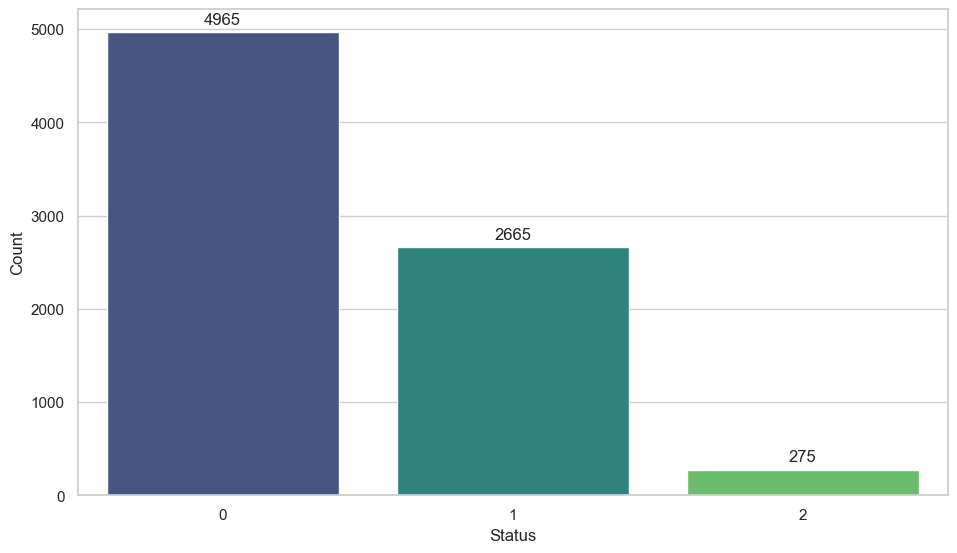

In [66]:
data = {
    "Status": np.sort(df_y_train['Status'].unique()),
    "count": pd.DataFrame(df_y_train).value_counts().values,
}
df = pd.DataFrame(data)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x="Status", y="count", data=df, palette="viridis")

# Adding text labels for each bar
for p in bar_plot.patches:
    bar_plot.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 9),
        textcoords="offset points",
    )

plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='Status'>

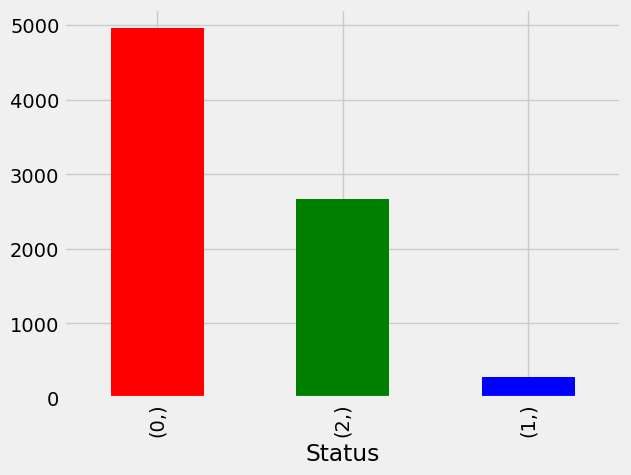

In [40]:
pd.DataFrame(df_y_train).value_counts().plot.bar(color=['r', 'g', 'b'])

In [ ]:
pd.DataFrame(df_y_train).value_counts().plot.bar(color=['r', 'g', 'b'])

#### Exploratory Data Analysis

DataFrame Head:


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Ascites,Drug,Edema,Hepatomegaly,Sex,Spiders
0,-0.942430,0.858448,-0.077237,-0.176908,-0.572940,1.160785,-0.113334,1.336304,-0.996442,1.472341,-1.189049,-0.037522,0.0,0.0,0.0,0.0,1.0,0.0
1,0.497025,0.234760,-0.444429,0.068784,-0.024043,-0.275420,-0.197909,0.414968,-0.520497,1.095026,0.474024,-0.037522,0.0,1.0,0.0,0.0,0.0,0.0
2,1.277529,-1.262634,0.185043,-0.263923,0.004846,0.620561,-0.413812,0.097266,-1.243933,-0.757248,1.369525,1.116605,0.0,1.0,2.0,1.0,0.0,1.0


DataFrame Tail:


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Ascites,Drug,Edema,Hepatomegaly,Sex,Spiders
7902,-0.415087,2.038155,-0.155921,-0.642698,-1.035169,-0.433534,-0.464242,-0.919380,-1.015479,-0.745814,2.648812,-1.191649,0.0,0.0,1.0,0.0,0.0,1.0
7903,1.420103,1.246520,-0.496885,-0.524971,-2.306298,-0.683882,-0.427470,-1.173542,0.050637,-0.505705,-0.037691,1.116605,0.0,0.0,0.0,1.0,1.0,0.0
7904,-0.047683,0.234760,-0.496885,-0.484022,-0.919612,-0.815644,-0.615532,-0.824070,-0.577610,0.809181,-0.421477,-0.037522,0.0,0.0,0.0,0.0,0.0,0.0


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(7905, 18)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   float64
 1   Age            7905 non-null   float64
 2   Bilirubin      7905 non-null   float64
 3   Cholesterol    7905 non-null   float64
 4   Albumin        7905 non-null   float64
 5   Copper         7905 non-null   float64
 6   Alk_Phos       7905 non-null   float64
 7   SGOT           7905 non-null   float64
 8   Tryglicerides  7905 non-null   float64
 9   Platelets      7905 non-null   float64
 10  Prothrombin    7905 non-null   float64
 11  Stage          7905 non-null   float64
 12  Ascites        7905 

/opt/miniconda3/envs/py311env/lib/python3.11/site-packages/fasteda/__init__.py:86: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  full_info.iloc[:,:-2] = full_info.iloc[:,:-2].applymap(lambda x: format(x, '.3f') \
/opt/miniconda3/envs/py311env/lib/python3.11/site-packages/fasteda/__init__.py:86: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'N_Days           7905
Age              7905
Bilirubin        7905
Cholesterol      7905
Albumin          7905
Copper           7905
Alk_Phos         7905
SGOT             7905
Tryglicerides    7905
Platelets        7905
Prothrombin      7905
Stage            7905
Ascites          7905
Drug             7905
Edema            7905
Hepatomegaly     7905
Sex              7905
Spiders          7905
Name: count, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  full_info.iloc[:,:-2] = full_info

,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
N_Days,7905,-0,-0.182,1,-1.818,-0.731,-0.182,0.602,2.527,0.448575,-0.494464
Age,7905,-0,0.092,1,-2.385,-0.761,0.092,0.628,2.793,0.084075,-0.497827
Bilirubin,7905,-0,-0.392,1,-0.602,-0.497,-0.392,0.106,6.663,3.339062,12.899902
Cholesterol,7905,0,-0.269,1,-1.18,-0.525,-0.269,0.202,7.291,3.678959,18.150082
Albumin,7905,-0,0.092,1,-4.589,-0.573,0.092,0.64,3.154,-0.561043,1.338016
Copper,7905,-0,-0.275,1,-1.053,-0.592,-0.275,0.238,6.642,2.701223,10.205772
Alk_Phos,7905,-0,-0.334,1,-0.803,-0.516,-0.334,0.021,6.328,3.194951,11.591656
SGOT,7905,-0,-0.125,1,-1.809,-0.792,-0.125,0.479,7.023,1.534514,5.812350
Tryglicerides,7905,-0,-0.216,1,-1.568,-0.597,-0.216,0.45,9.189,2.633421,15.037843
Platelets,7905,-0,-0.003,1,-2.324,-0.62,-0.003,0.581,3.405,0.419968,0.329610


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



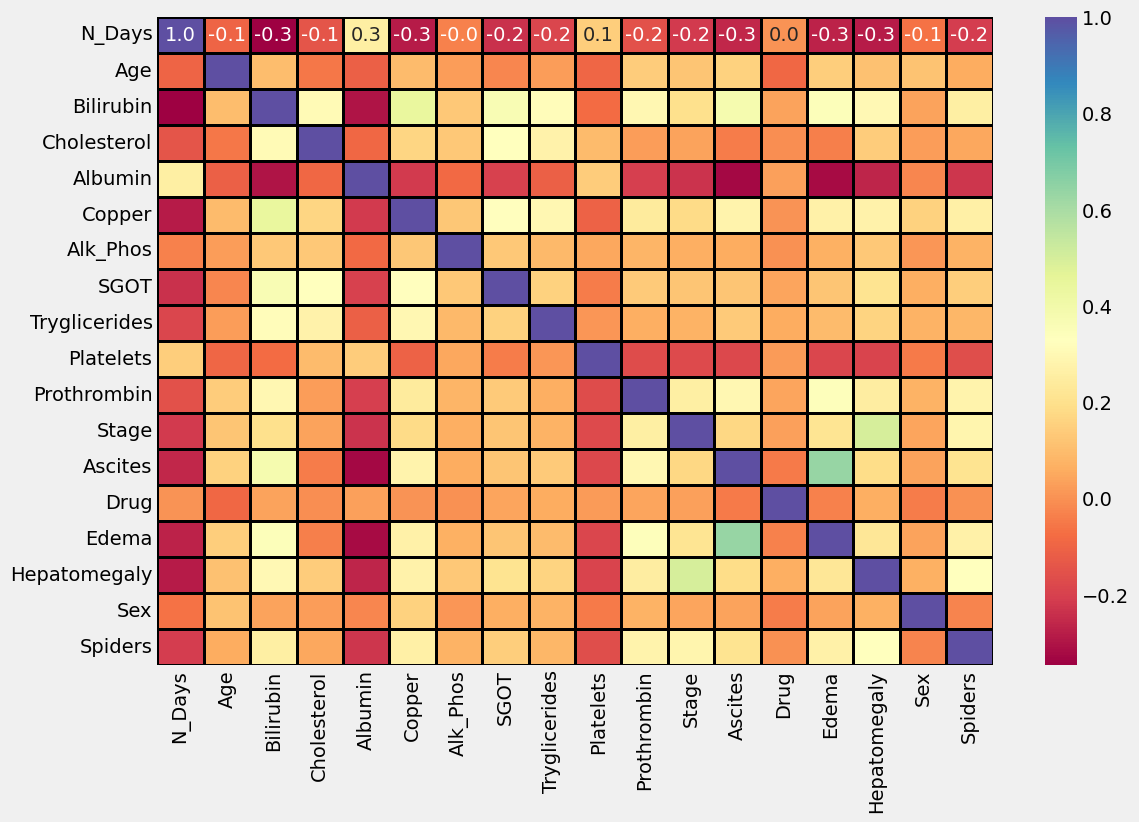

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



/opt/miniconda3/envs/py311env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


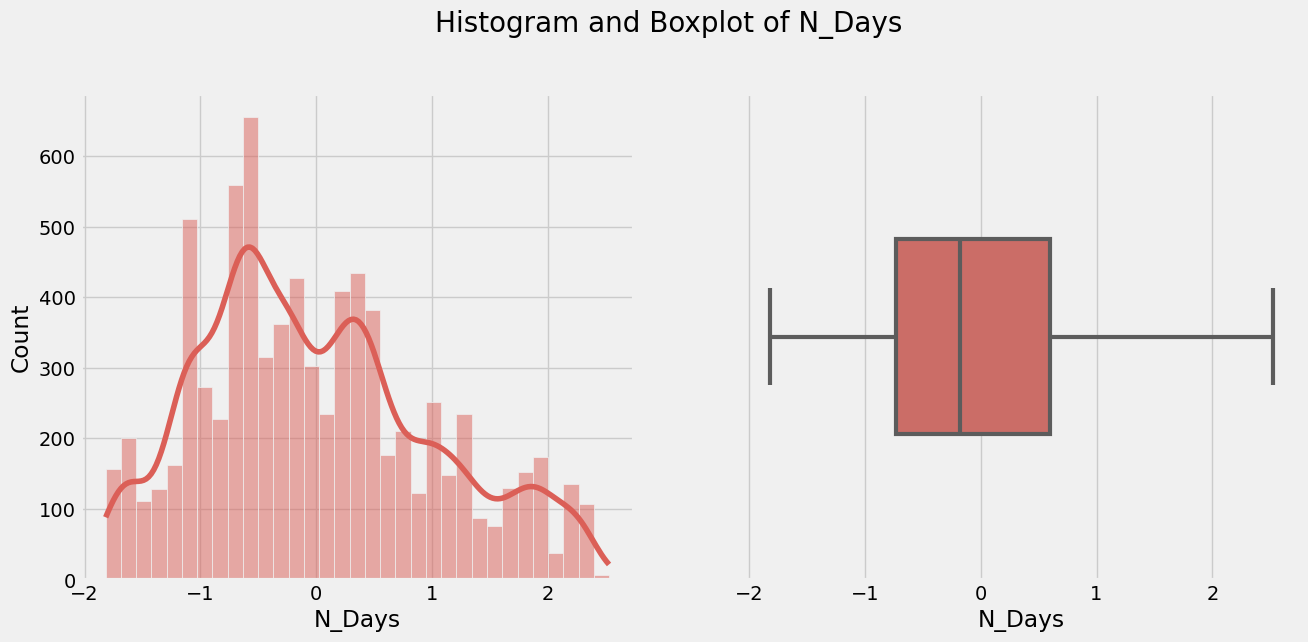

/opt/miniconda3/envs/py311env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


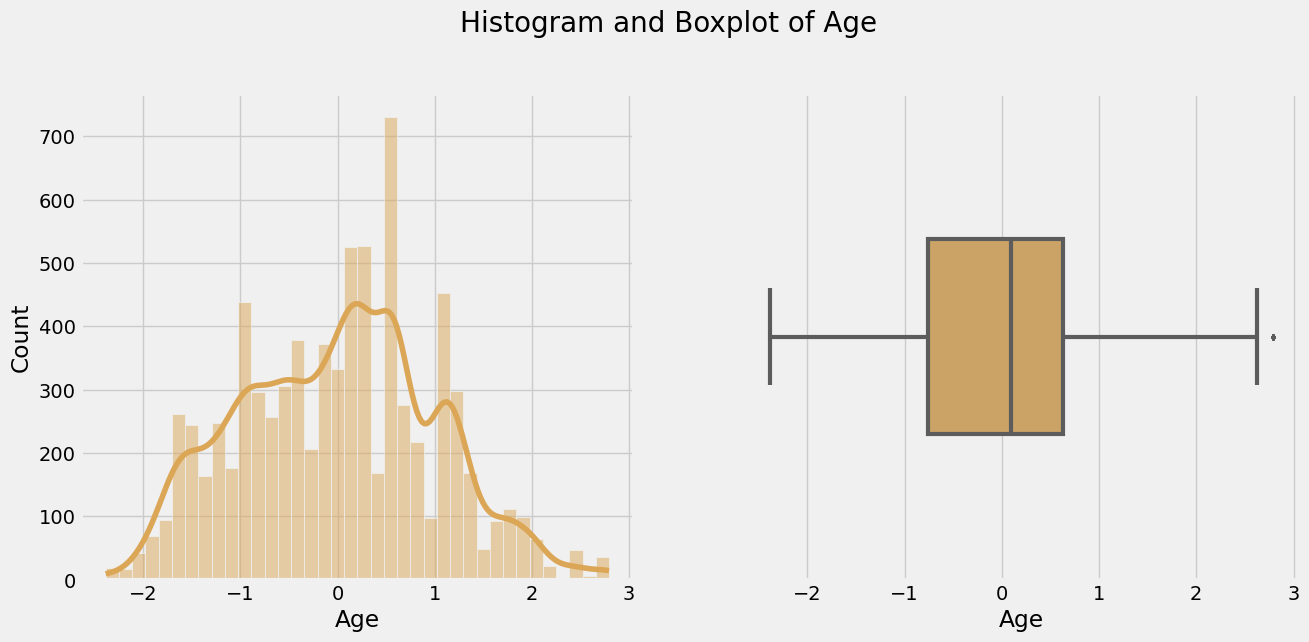

/opt/miniconda3/envs/py311env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


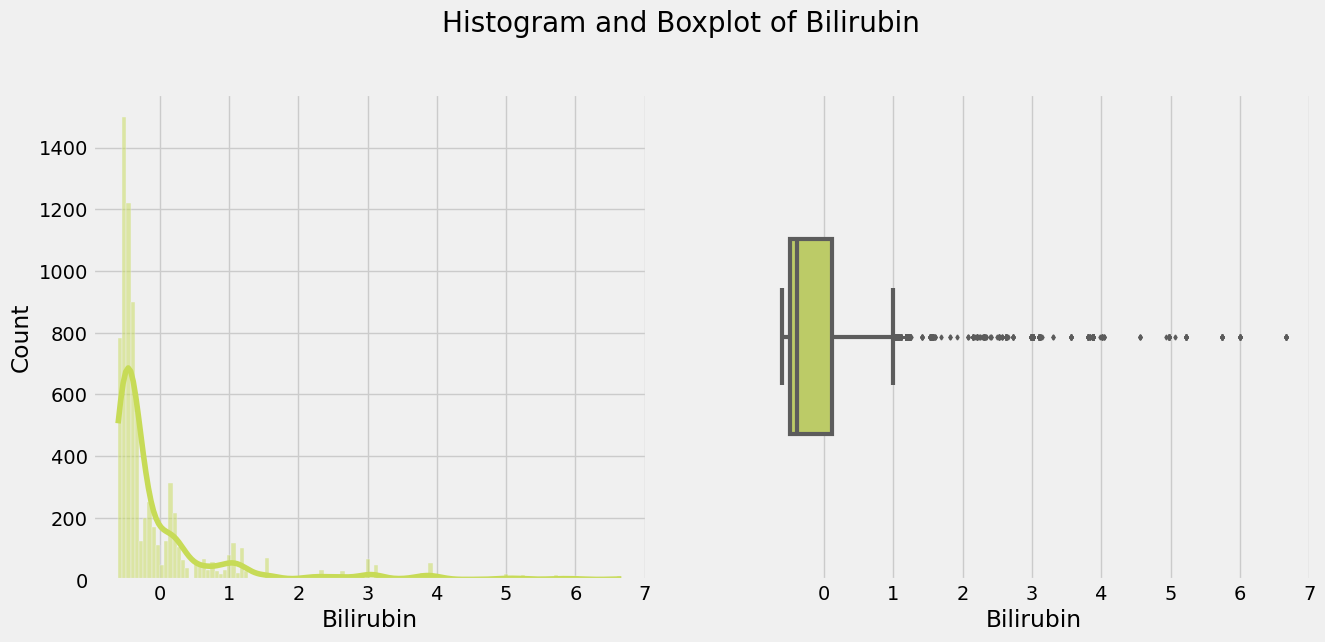

/opt/miniconda3/envs/py311env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


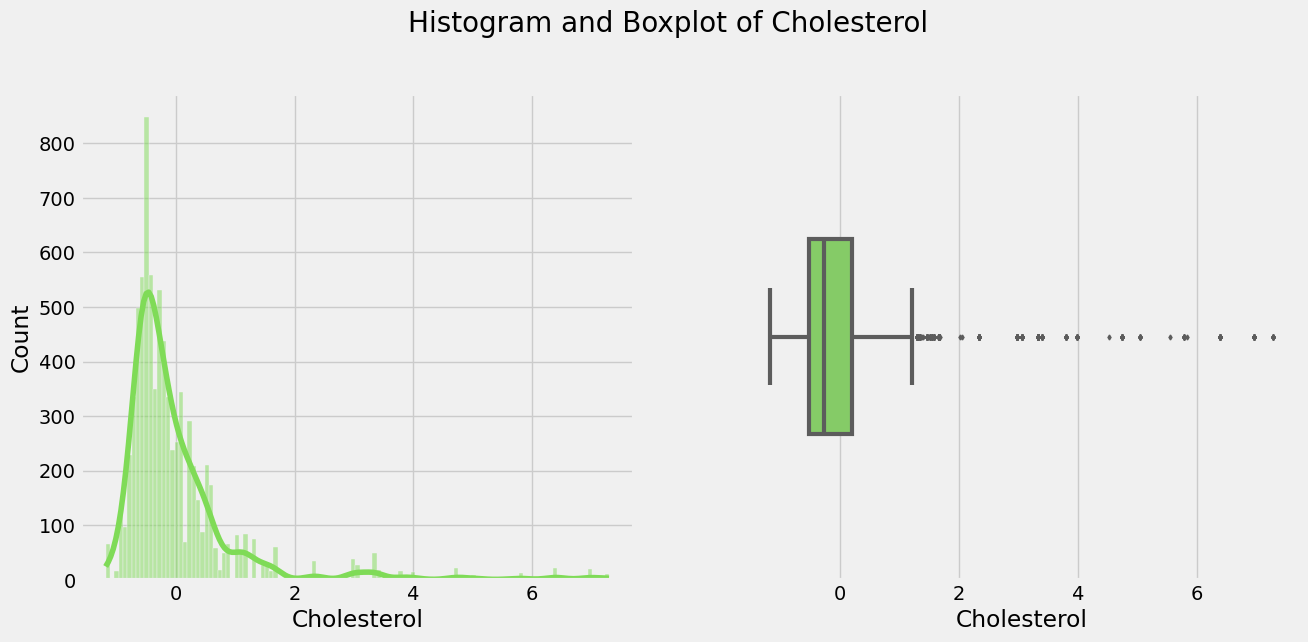

/opt/miniconda3/envs/py311env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


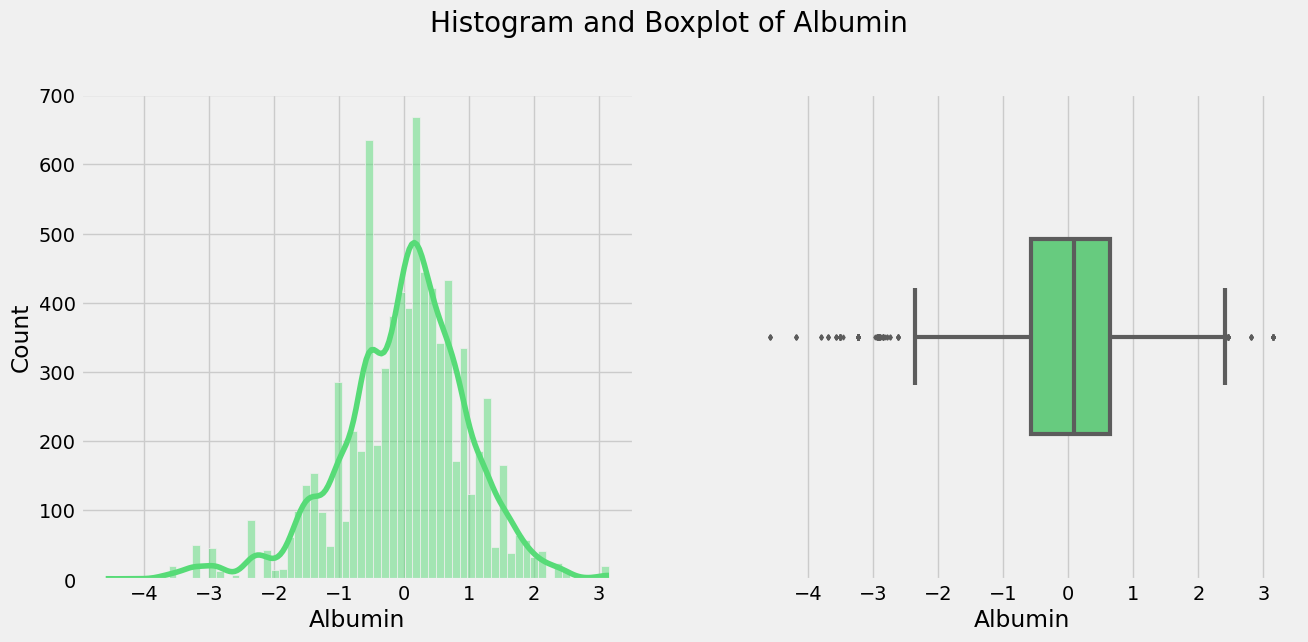

/opt/miniconda3/envs/py311env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


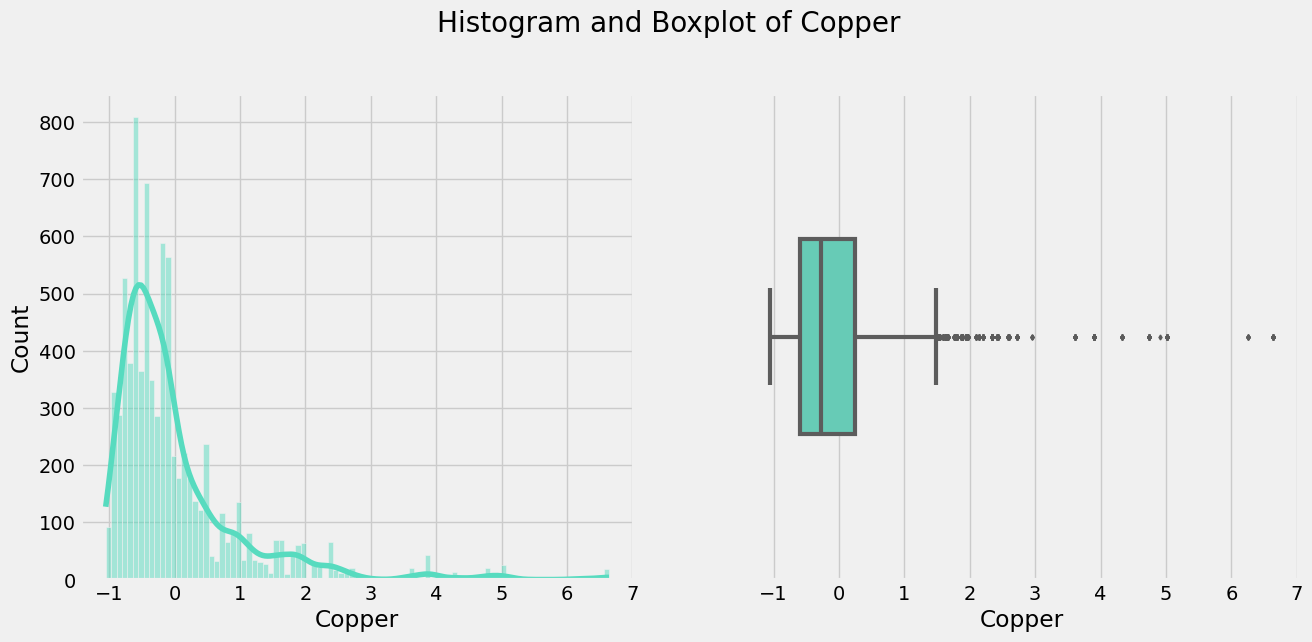

/opt/miniconda3/envs/py311env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


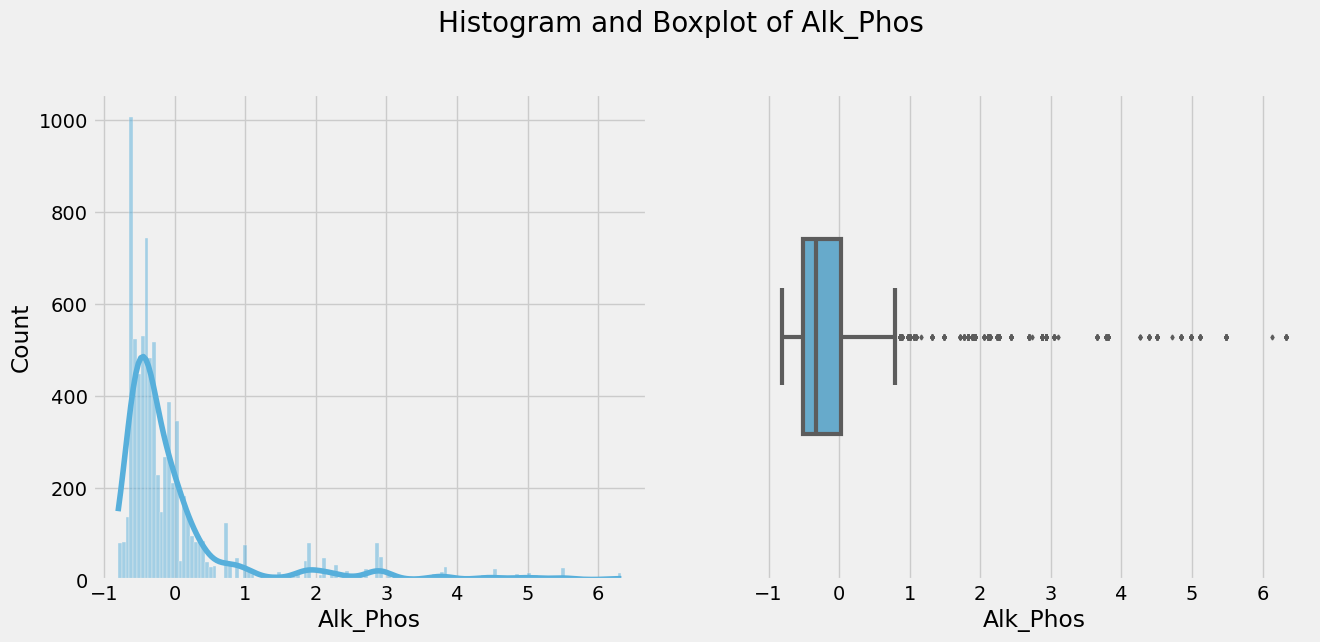

/opt/miniconda3/envs/py311env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


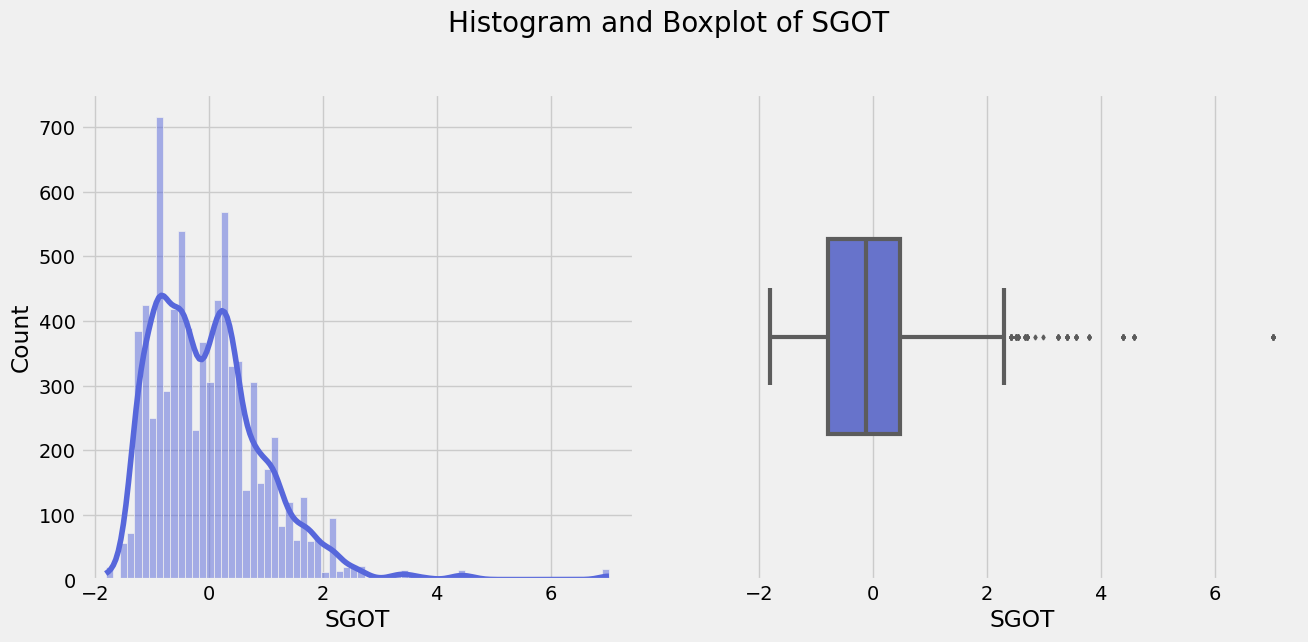

/opt/miniconda3/envs/py311env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


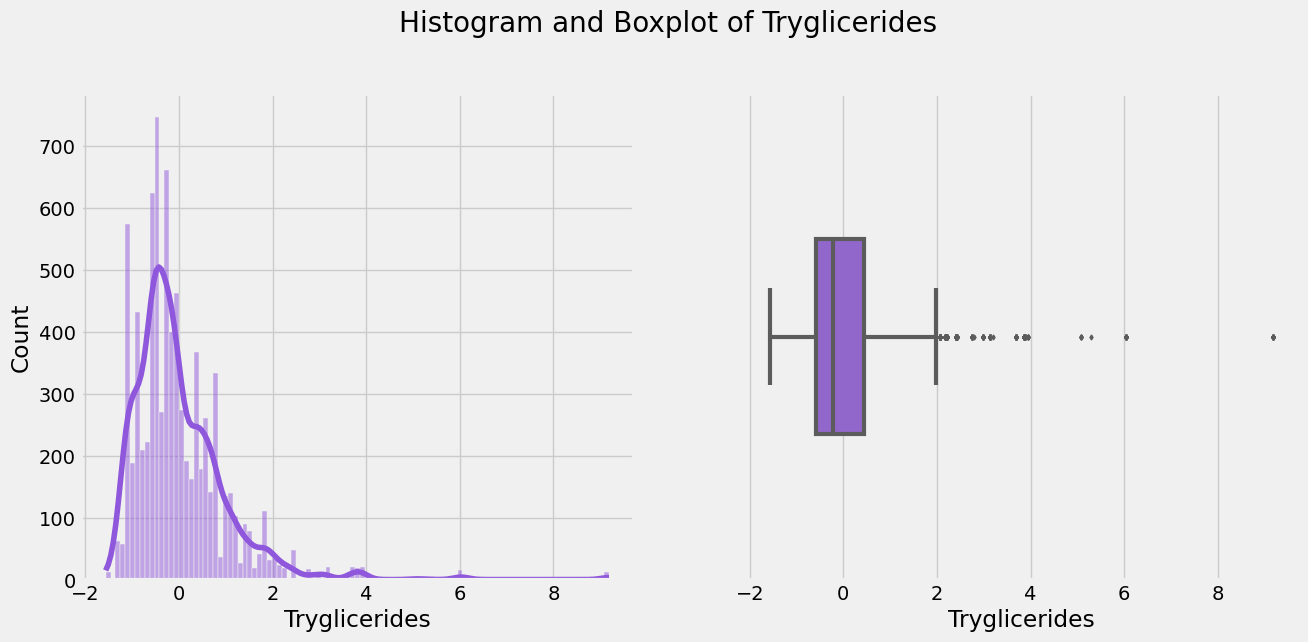

/opt/miniconda3/envs/py311env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


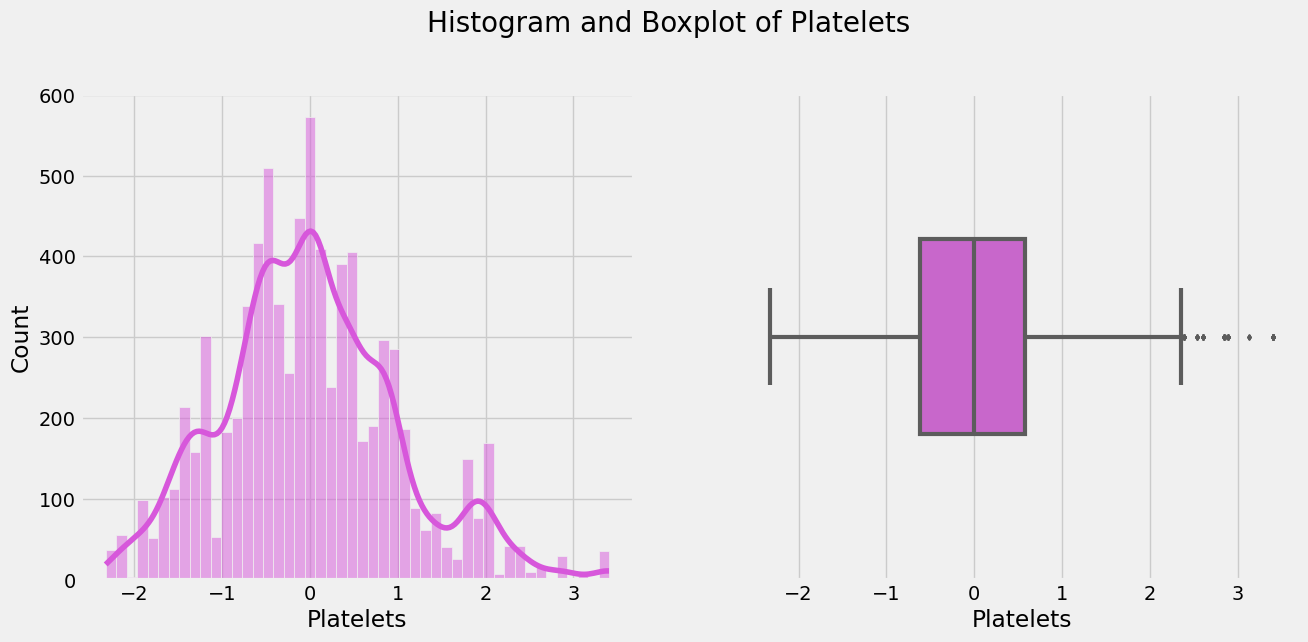

/opt/miniconda3/envs/py311env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


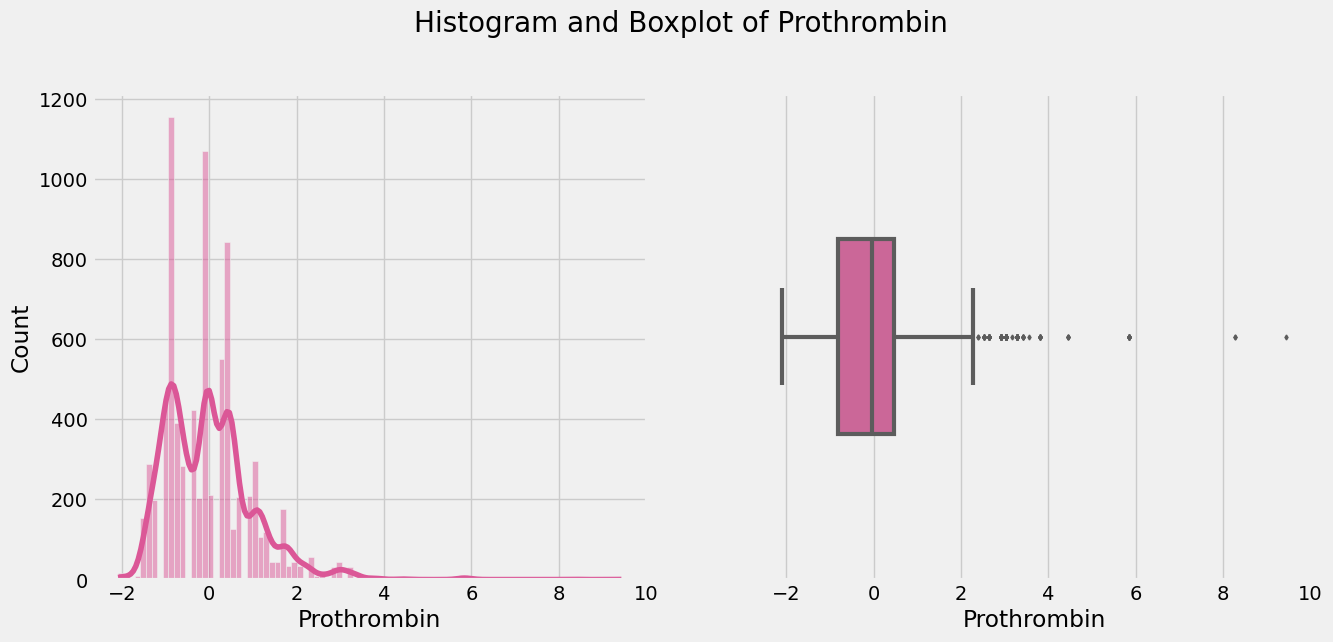

----------------------------------------------------------------------------------------------------
Countplot(s):



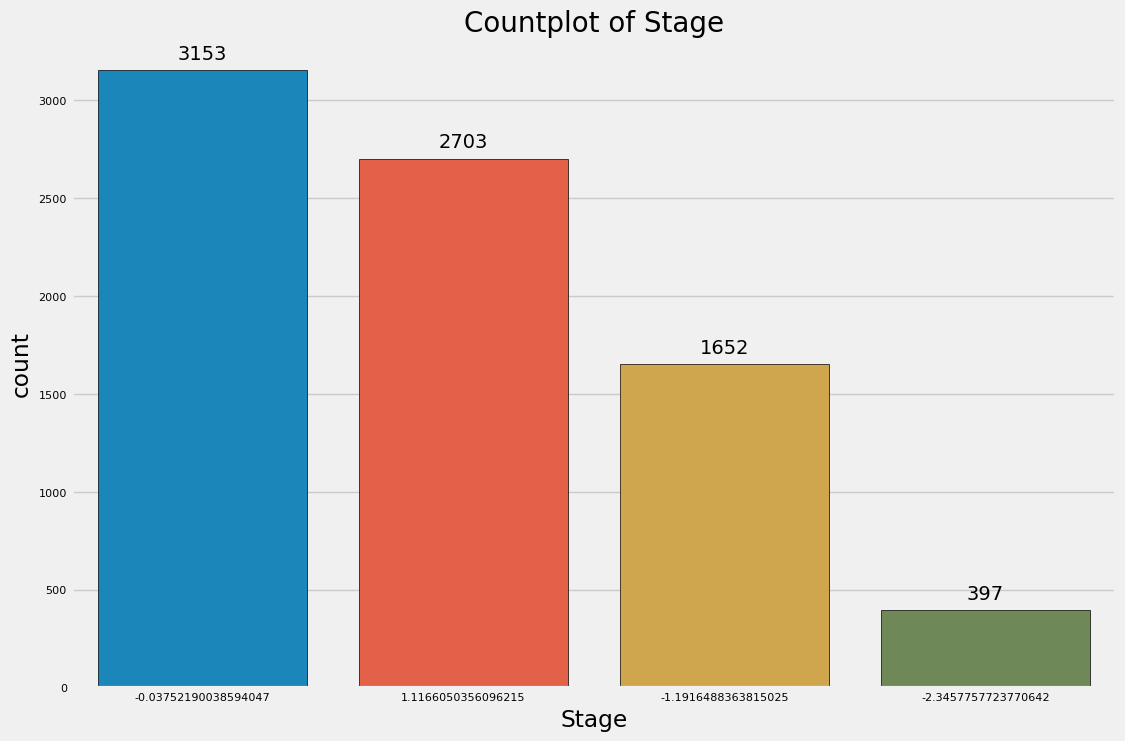

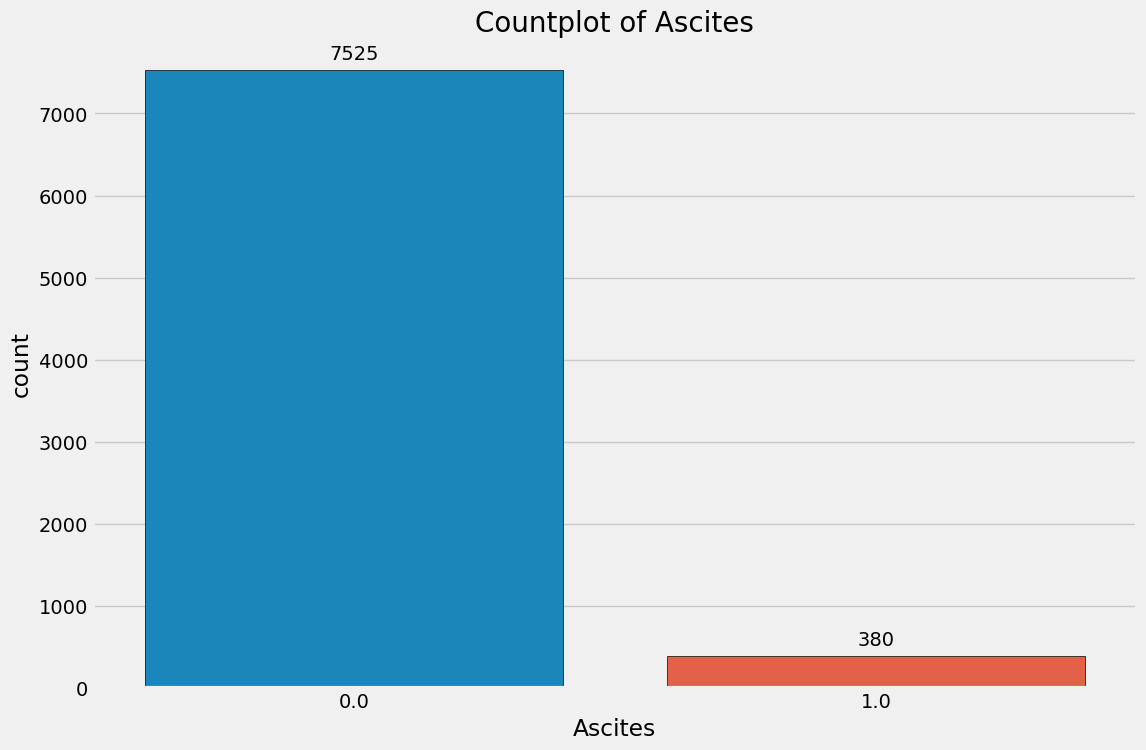

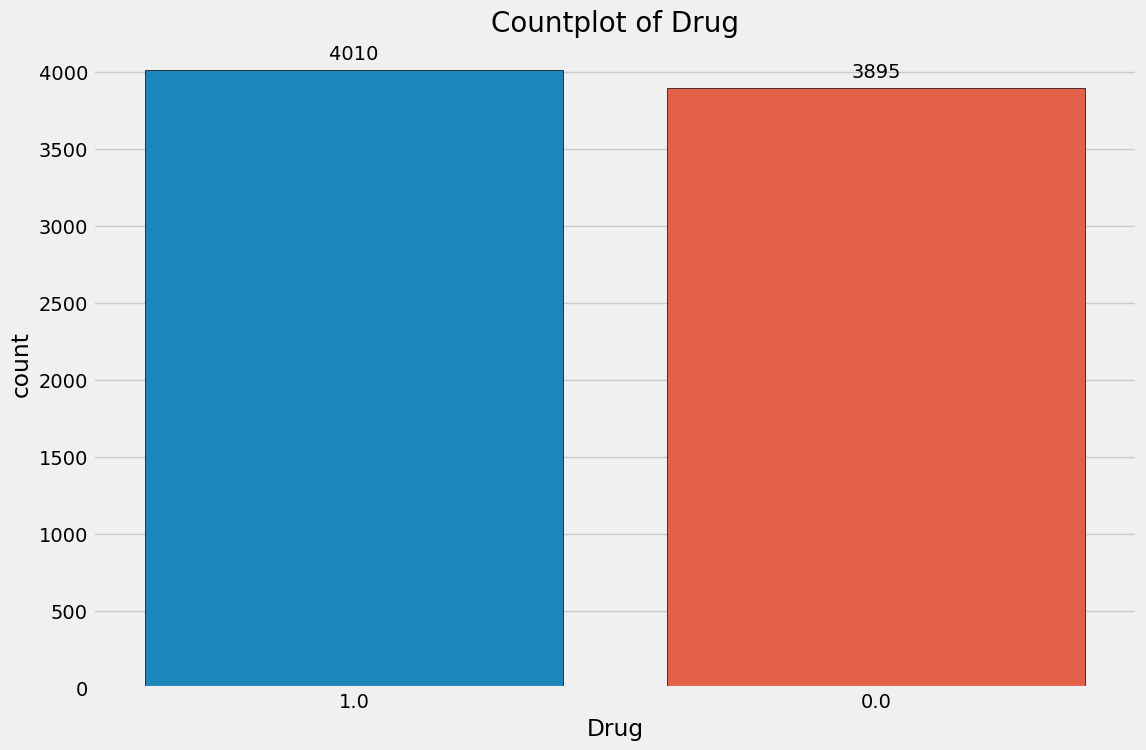

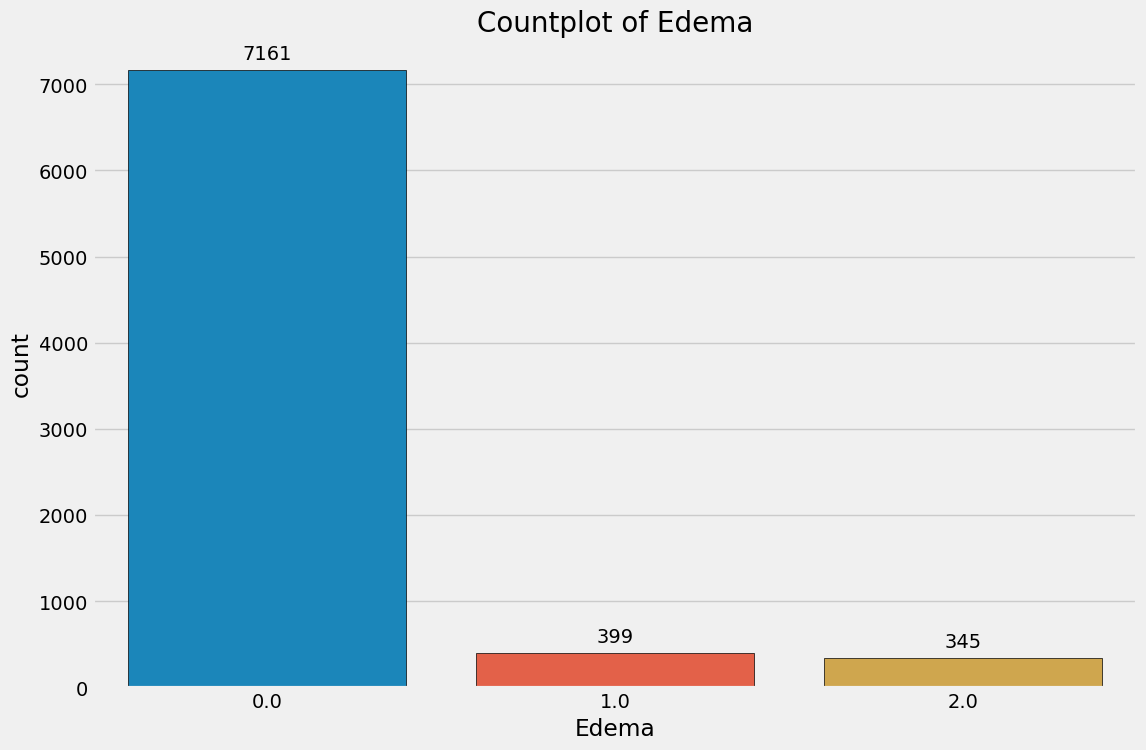

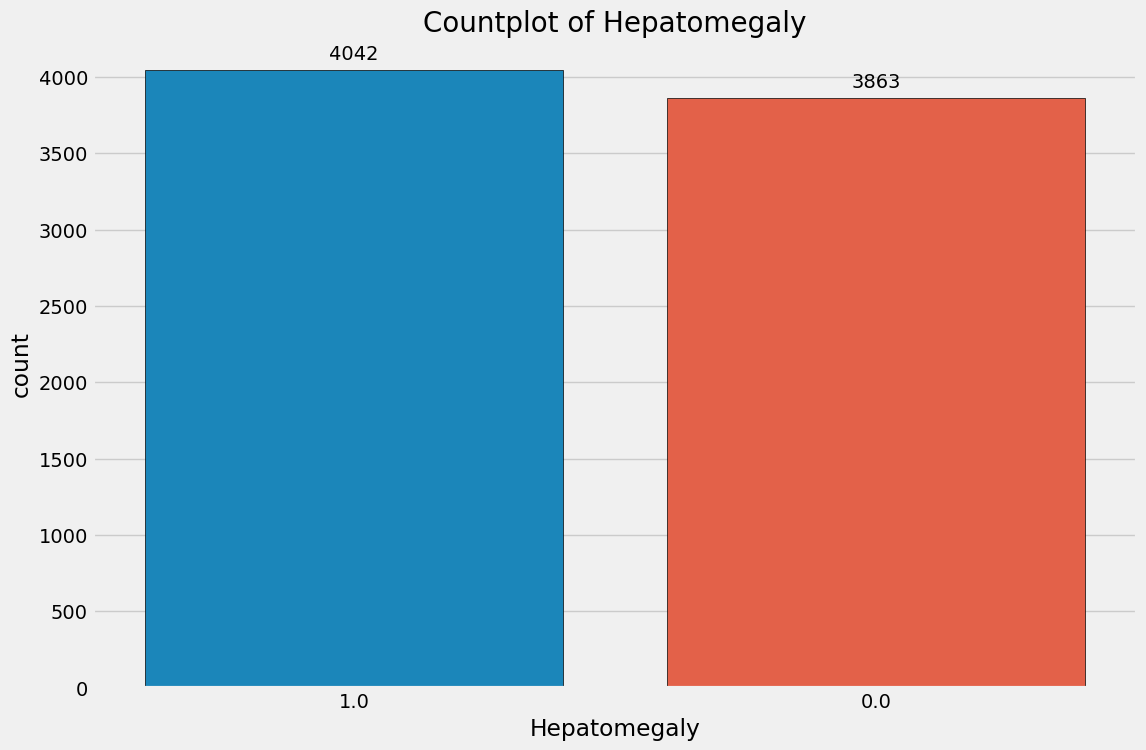

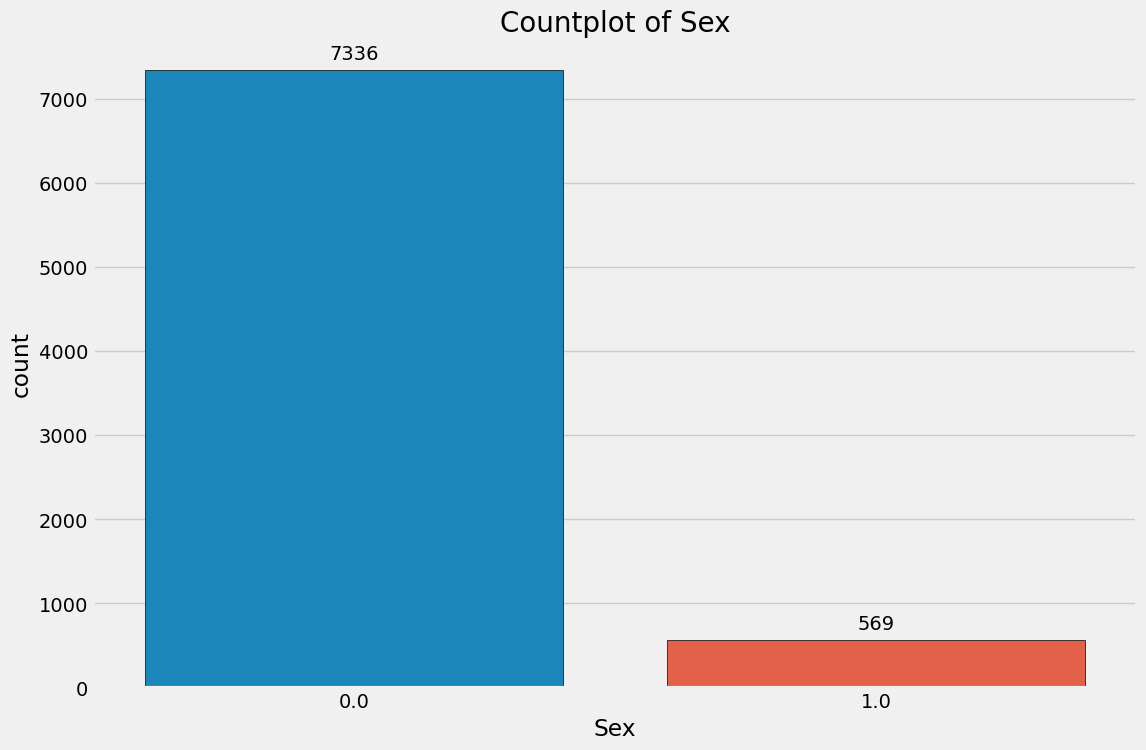

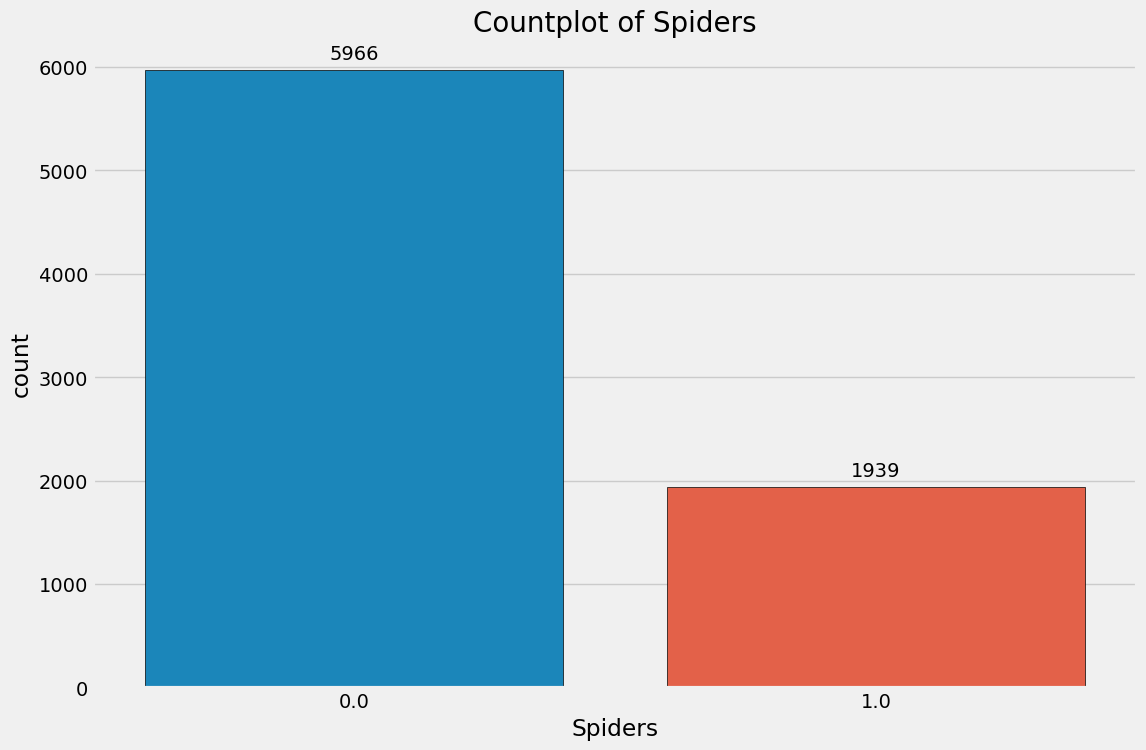

In [41]:
# X train subset
fast_eda(df_X_train)